<a href="https://colab.research.google.com/github/Varun-Singhal/Neural-Network/blob/master/Yolo_Basic_3C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 300
l = 10
num_filter = 20

Using TensorFlow backend.


In [0]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape,y_train.shape)


(50000, 32, 32, 3) (50000, 10)


In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=8)

In [0]:
input = Input(shape=(img_height, img_width, channel,))

#Block1

layer1 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(input)
layer2 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer1)
layer3 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer2)
layer4 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer3)
layer5 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer4)
layer_x1 = BatchNormalization()(layer5)

layer6 = MaxPooling2D((2,2))(layer_x1)

#Block2

layer7 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer6)
layer8 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer7)
layer9 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer8)
layer10 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer9)
layer11 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer10)
layer_x2 = BatchNormalization()(layer11)

layer12 = MaxPooling2D((2,2))(layer_x2)

#Block3

layer13 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer12)
layer14 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer13)
layer15 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer14)
layer16 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer15)
layer17 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer16)
layer_x3 = BatchNormalization()(layer17)

layer18 = MaxPooling2D((2,2))(layer_x3)

#Block4

layer19 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer18)
layer20 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer19)
layer21 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer20)
layer22 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer21)
layer23 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer22)

layer_x4 = BatchNormalization()(layer23)

layer24 = MaxPooling2D((2,2))(layer_x4)

#Concatenation
layer = Lambda(space_to_depth_x2)(layer6)
layer25 = concatenate([layer,layer24])

#Flatten

flatten = Flatten()(layer24)
output = Dense(num_classes, activation='softmax')(flatten)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 512)       2048      
__________

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 201s 4ms/step - loss: 2.5151 - acc: 0.1424 - val_loss: 2.5650 - val_acc: 0.1167
Epoch 2/50
50000/50000 [==============================] - 188s 4ms/step - loss: 2.2091 - acc: 0.1956 - val_loss: 2.0488 - val_acc: 0.2024
Epoch 3/50
50000/50000 [==============================] - 188s 4ms/step - loss: 1.7921 - acc: 0.3349 - val_loss: 2.2063 - val_acc: 0.2651
Epoch 4/50
50000/50000 [==============================] - 188s 4ms/step - loss: 1.8882 - acc: 0.3192 - val_loss: 2.2883 - val_acc: 0.1974
Epoch 5/50
50000/50000 [==============================] - 187s 4ms/step - loss: 2.3569 - acc: 0.1958 - val_loss: 2.3037 - val_acc: 0.1028
Epoch 6/50
50000/50000 [==============================] - 187s 4ms/step - loss: 2.3833 - acc: 0.1973 - val_loss: 2.8433 - val_acc: 0.1377
Epoch 7/50
50000/50000 [==============================] - 187s 4ms/step - 

In [0]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save the trained weights in to .h5 format
model.save_weights("Yolo_Basic_model2.h5")
print("Saved the model to disk")

10000/10000 [==============================] - 15s 1ms/step
Test loss: 1.1325201252698898
Test accuracy: 0.7645
Saved the model to disk


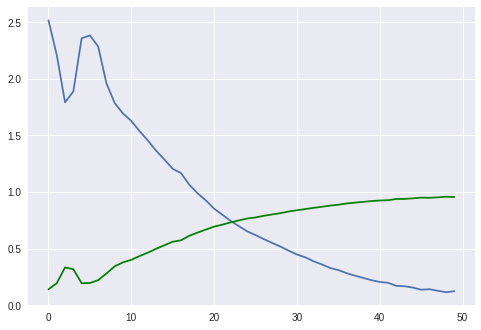

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['acc'],'g')
plt.show()

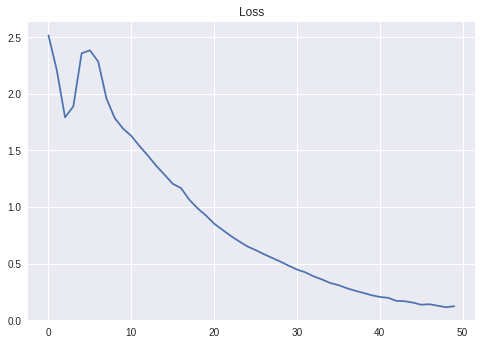

In [0]:
plt.plot(history.history['loss'])
plt.title("Loss")
plt.show()

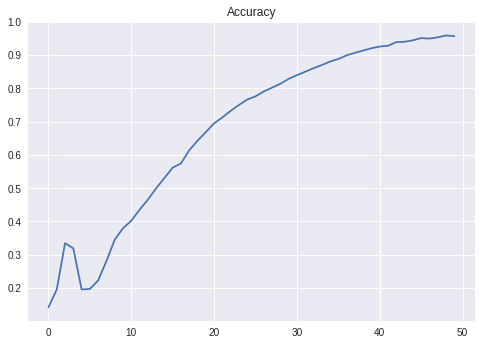

In [0]:
plt.plot(history.history['acc'])
plt.title("Accuracy")
plt.show()